In [1]:
import pandas as pd

data = pd.read_csv('product.csv')
labels = data.pop('labels')

keep_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[data.columns.intersection(keep_cols)]

#data['date'] = pd.to_datetime(data['date'])
#data = data.drop(columns='date') ## set_index
data.tail()

,Open,High,Low,Close,Volume
437033,20733.40,20737.60,20714.55,20723.58,296.43190
437034,20723.58,20731.71,20722.04,20728.18,130.95576
437035,20729.21,20733.84,20726.66,20729.99,102.02255
437036,20730.00,20736.31,20728.14,20730.54,128.59032
437037,20731.53,20738.50,20726.88,20728.70,239.28596


labels
 0    388717
-1     29291
 1     19030
Name: count, dtype: int64


<Axes: xlabel='labels'>

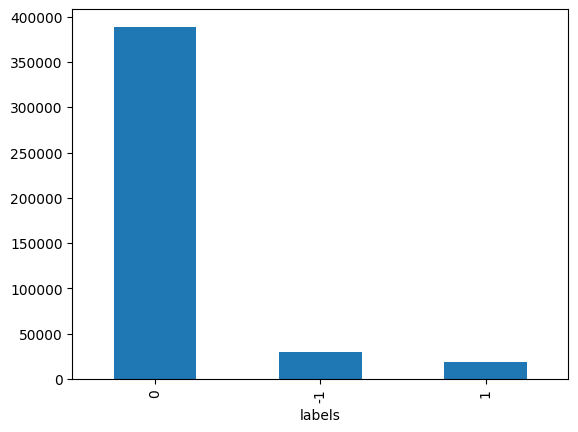

In [2]:
labels.to_csv('data/y.csv')
print(labels.value_counts())
labels.value_counts().plot.bar()

In [3]:
from backtesting import  Strategy, Backtest

## For extra TA indicators
def I_helper(series): return series

class Boltning(Strategy):
    
    def init(self):

        self.bare_prediction = pd.read_csv('data/y.csv')
        self.prediction  = self.I(I_helper, self.bare_prediction, name= 'prediction')
        self.prediction = self.prediction[-1]

    def next(self):
        price = self.data.Close[-1]
        ## print(price, self.prediction[-1])


        if self.prediction[-1] == 1:
            self.buy(size= 1,sl=0.96*price, tp=1.04*price)

        elif self.prediction[-1] == -1:
            self.buy(size=-1,sl=1.04*price, tp=0.96*price)



## Make sure the sl/tp matches from the stategy file....
bt = Backtest(data, Boltning, cash=1000000, commission=.002)
stats = bt.run()
print(stats)
bt.plot()

c:\Users\bhavi\miniconda3\envs\zalk\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\bhavi\AppData\Local\Temp\ipykernel_11424\1191146953.py:28: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(data, Boltning, cash=1000000, commission=.002)


Start                                     0.0
End                                  437037.0
Duration                             437037.0
Exposure Time [%]                   32.974021
Equity Final [$]                32333010.1697
Equity Peak [$]                 32333010.1697
Return [%]                        3133.301017
Buy & Hold Return [%]              -55.259623
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                   -4.969461
Avg. Drawdown [%]                   -0.120703
Max. Drawdown Duration                 7685.0
Avg. Drawdown Duration              32.852052
# Trades                              33062.0
Win Rate [%]                        99.204525
Best Trade [%]                       3.933261
Worst Trade [%]                     -4.292396
Avg. Trade [%]                    

Row(id='1473', ...)